# Tarea 2
## Importación de módulos

In [92]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from IPython.display import display

## Clase del problema

In [93]:
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=3,
                        n_obj=2,
                        xl=0,
                        xu=500)
        
    def _evaluate(self, x, out, *args, **kwargs):
        
        # Cantidad de tornos
        T = x[0]
        # Cantidad de fresadoras
        F = x[1]
        # Cantidad de multiproposito
        M = x[2]
        
        penCab = 280 - (2*T+F+5*M)
        penM  = 120 - (6*T+3*F+12*M)
        penCar = 670 - (2*T+8*F+4*M)
        penA = 250 - (2*T+6*F+6*M)
        
        penalizaciones = [penCab, penM, penCar, penA]
        
        pen = 0
        
        for i in range(4):
            if penalizaciones[i] < 0:
                pen = pen + penalizaciones[i]
        
        #f1 = -(4*T+8*F+12*M)+((6*T+3*F+12*M)/(120))**5
        f1 = -(4*T+8*F+12*M)-pen
        f2 = -100+(abs(T-F)+abs(T-M)+abs(F-M))
        
        out["F"] = [f1, f2]
        
problem = MyProblem()    

## Inicialización del algoritmo

In [94]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.mutation.pm import PM
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.repair.rounding import RoundingRepair

algorithm = NSGA2(pop_size=200, 
                sampling=IntegerRandomSampling(),
                crossover=SBX(prob=1.0, vtype=float, repair=RoundingRepair()),
                mutation=PM(prob=1.0, vtype=float, repair=RoundingRepair()),
                eliminate_duplicates = True)

## Criterio de parada

In [95]:
from pymoo.termination import get_termination

termination = get_termination("n_gen", 100)

## Optimización

In [96]:
from pymoo.optimize import minimize

res = minimize(problem,
            algorithm,
            termination,
            seed=1,
            save_history=True,
            verbose=True)
X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      200 |      1 |             - |             -
     2 |      400 |      1 |  2.0000000000 |         ideal
     3 |      600 |      2 |  1.0000000000 |         ideal
     4 |      800 |      4 |  0.1842105263 |         nadir
     5 |     1000 |      8 |  0.0731707317 |         ideal
     6 |     1200 |     14 |  0.1347517730 |         ideal
     7 |     1400 |     16 |  0.0275862069 |         ideal
     8 |     1600 |     18 |  0.0522875817 |         ideal
     9 |     1800 |     22 |  0.0160771704 |         ideal
    10 |     2000 |     26 |  0.0153042185 |             f
    11 |     2200 |     30 |  0.0199203187 |         ideal
    12 |     2400 |     30 |  0.5304878049 |         nadir
    13 |     2600 |     32 |  0.0120481928 |         ideal
    14 |     2800 |     35 |  0.0023317483 |             f
    15 |     3000 |     37 |  0.0049154548 |             f
    16 |     3200 |     39 |  0.0028863555 |            

## Visualización de Resultados

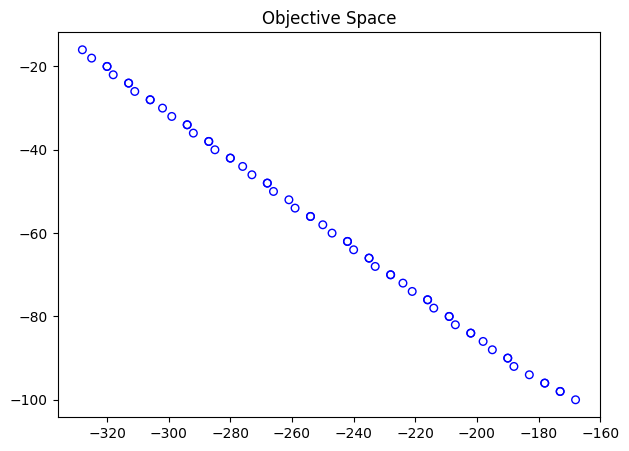

In [97]:
import matplotlib.pyplot as plt

#xl, xu = problem.bounds()
#plt.figure(figsize=(7, 5))
#plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
#plt.xlim(xl[0], xu[0])
#plt.ylim(xl[1], xu[1])
#plt.title("Design Space")
#plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

# Referencias

#### https://pymoo.org/getting_started/index.html
#### https://pymoo.org/customization/discrete.html
#### https://pymoo.org/interface/problem.html
